# Date Fruit Classification with LLaMA 3.1-8B and Groq

## Setup and Dependencies

In [1]:
!pip install groq pandas numpy matplotlib seaborn scikit-learn langgraph openpyxl python-dotenv

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [7]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from groq import Groq
from langgraph.graph import Graph
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import json
import time

# Load environment variables
load_dotenv()
GROQ_API_KEY = os.getenv('GROQ_API_KEY')

# Initialize Groq client
client = Groq(api_key=GROQ_API_KEY)

# Set plot style
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")
sns.set_palette("husl")

## Data Loading and Initial Analysis

In [8]:
# Load dataset
df = pd.read_excel('data/Date_Fruit_Datasets.xlsx')

print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(df.columns.tolist())
print("\nSample Data:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset Shape: (898, 35)

Feature Names:
['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB', 'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class']

Sample Data:


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64


## Exploratory Data Analysis

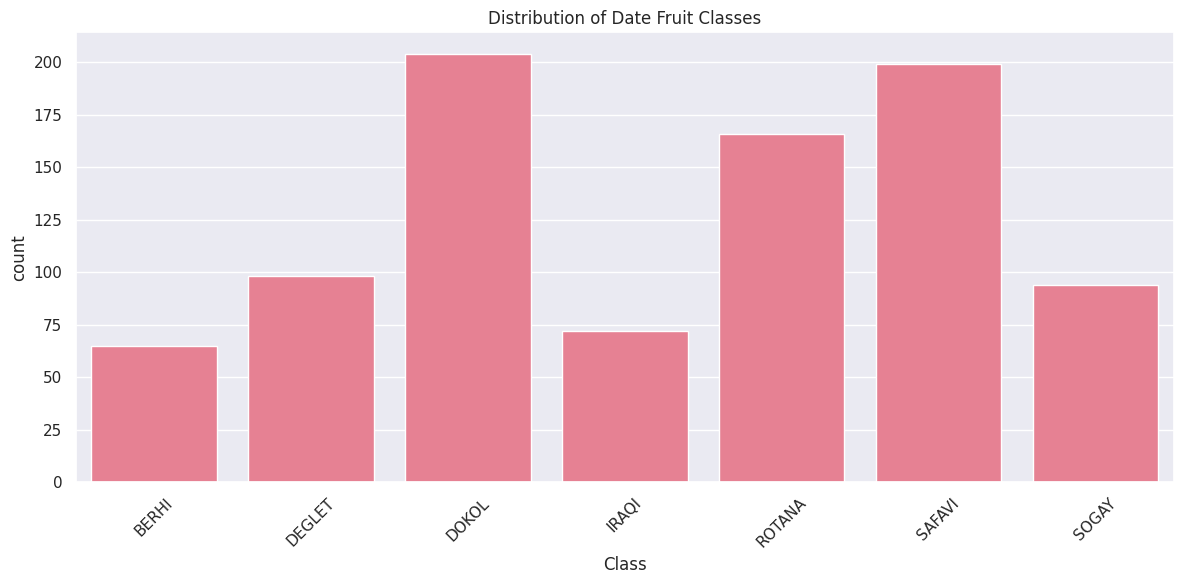

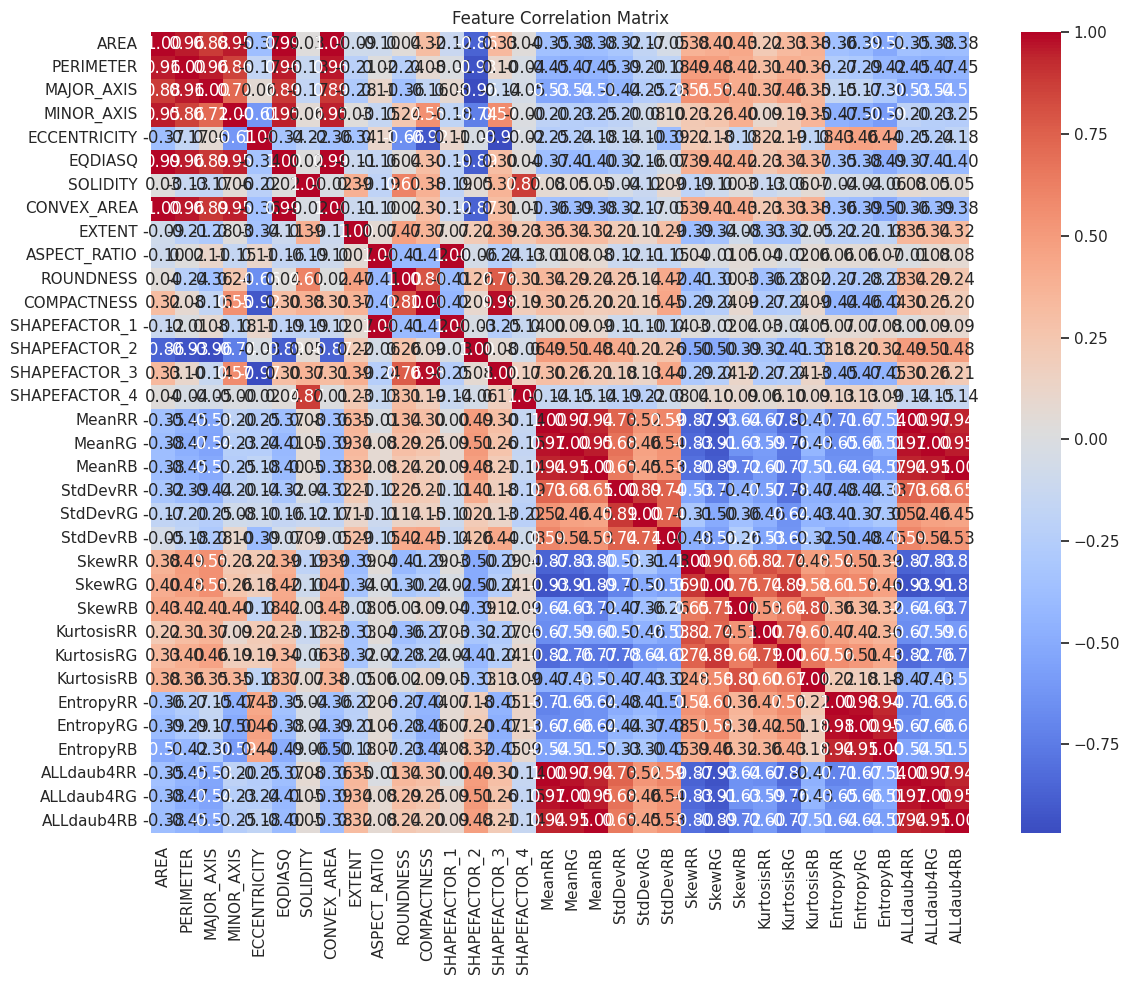

In [11]:
def create_eda_plots():
    # Class distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Class')
    plt.title('Distribution of Date Fruit Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('reports/charts/class_distribution.png')
    plt.show()
    
    # Feature correlations
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.drop('Class', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig('reports/charts/correlation_matrix.png')
    plt.show()

# Create and save EDA plots
create_eda_plots()

## AI Agent Implementation using LangGraph

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from groq import Groq
import os
import json
import time
import re  # Add missing import for regular expressions
from datetime import datetime
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
GROQ_API_KEY = os.getenv('GROQ_API_KEY')
client = Groq(api_key=GROQ_API_KEY)

# Create directories for outputs
os.makedirs('reports', exist_ok=True)
os.makedirs('reports/charts', exist_ok=True)
os.makedirs('reports/benchmark', exist_ok=True)

class DateFruitAgent:
    def __init__(self, model="llama-3.1-8b-instant"):
        self.client = client
        self.model = model
        self.scaler = StandardScaler()
        self.benchmark_data = {
            "model": model,
            "samples_processed": 0,
            "total_time": 0,
            "average_time": 0,
            "analysis_times": [],
            "classification_times": [],
            "classifications": []
        }
        
    def process_features(self, sample):
        """Process and scale features"""
        try:
            # Extract numerical features
            features = {}
            for k, v in sample.items():
                if k != 'Class' and pd.notnull(v):
                    try:
                        features[k] = float(v)
                    except (ValueError, TypeError):
                        continue
            
            # Scale features
            feature_names = list(features.keys())
            feature_values = np.array([list(features.values())])
            scaled_values = self.scaler.fit_transform(feature_values)
            
            return {
                'original': features,
                'scaled': dict(zip(feature_names, scaled_values[0])),
                'feature_names': feature_names
            }
        except Exception as e:
            print(f"Feature processing error: {str(e)}")
            return None
    
    def analyze_features(self, features):
        """Analyze features using LLaMA model"""
        try:
            start_time = time.time()
            
            # Format features for prompt
            feature_desc = "\n".join([
                f"{k}: {v:.4f} (scaled: {features['scaled'][k]:.4f})" 
                for k, v in features['original'].items()
            ])
            
            prompt = f"""Analyze these date fruit features:
            
            {feature_desc}
            
            Provide:
            1. Key characteristics
            2. Most important features
            3. Notable patterns
            4. Classification confidence
            
            Format as clear sections."""
            
            print("Sending analysis request to LLaMA...")
            response = self.client.chat.completions.create(
                model=self.model,
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                max_tokens=500
            )
            
            end_time = time.time()
            analysis_time = end_time - start_time
            self.benchmark_data["analysis_times"].append(analysis_time)
            print(f"Analysis completed in {analysis_time:.2f} seconds")
            
            return response.choices[0].message.content
            
        except Exception as e:
            print(f"Analysis error: {str(e)}")
            return None
    
    def get_classification(self, features):
        """Classify sample using LLaMA model"""
        try:
            start_time = time.time()
            
            # Prepare classification prompt
            scaled_features = "\n".join([
                f"{k}: {v:.4f}" for k, v in features['scaled'].items()
            ])
            
            prompt = f"""Given these scaled date fruit features:
            
            {scaled_features}
            
            Classify this sample into one of these categories:
            - BERHI
            - DEGLET
            - DOKOL
            - IRAQI
            - ROTANA
            - SAFAVI
            - SOGAY
            
            Your response must begin with the class name in all caps, 
            followed by your confidence score (0-1) and reasoning.
            Example format: "BERHI - 0.85 confidence. Reasoning: ..."
            """
            
            print("Sending classification request to LLaMA...")
            response = self.client.chat.completions.create(
                model=self.model,
                messages=[{"role": "user", "content": prompt}],
                temperature=0.3,
                max_tokens=300
            )
            
            end_time = time.time()
            classification_time = end_time - start_time
            self.benchmark_data["classification_times"].append(classification_time)
            print(f"Classification completed in {classification_time:.2f} seconds")
            
            result = response.choices[0].message.content
            
            # Extract classified class using regex
            class_pattern = r'(BERHI|DEGLET|DOKOL|IRAQI|ROTANA|SAFAVI|SOGAY)'
            match = re.search(class_pattern, result)
            if match:
                predicted_class = match.group(1)
                self.benchmark_data["classifications"].append(predicted_class)
                print(f"Predicted class: {predicted_class}")
            else:
                print("Could not extract class from response")
                self.benchmark_data["classifications"].append("UNKNOWN")
            
            return result
            
        except Exception as e:
            print(f"Classification error: {str(e)}")
            return None
    
    def analyze_sample(self, sample_data):
        """Main method to analyze a sample"""
        try:
            overall_start = time.time()
            
            print("Processing features...")
            features = self.process_features(sample_data)
            if not features:
                raise ValueError("Feature processing failed")
            
            print("Analyzing features...")
            analysis = self.analyze_features(features)
            if not analysis:
                raise ValueError("Feature analysis failed")
            
            print("Classifying sample...")
            classification = self.get_classification(features)
            if not classification:
                raise ValueError("Classification failed")
            
            overall_end = time.time()
            total_time = overall_end - overall_start
            
            # Update benchmark data
            self.benchmark_data["samples_processed"] += 1
            self.benchmark_data["total_time"] += total_time
            self.benchmark_data["average_time"] = self.benchmark_data["total_time"] / self.benchmark_data["samples_processed"]
            
            print(f"Total analysis time: {total_time:.2f} seconds")
            
            return {
                "analysis": analysis,
                "classification": classification,
                "features": features,
                "time_taken": total_time
            }
            
        except Exception as e:
            print(f"Analysis pipeline error: {str(e)}")
            return None
    
    def batch_analyze(self, samples, max_samples=10):
        """Process multiple samples and collect results"""
        results = []
        sample_count = min(len(samples), max_samples)
        
        for i, sample in enumerate(samples[:sample_count]):
            print(f"\nProcessing sample {i+1}/{sample_count}...")
            result = self.analyze_sample(sample)
            if result:
                results.append(result)
        
        # Save benchmark data
        self.save_benchmark_data()
        
        return results
    
    def save_benchmark_data(self):
        """Save benchmark results to file"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"reports/benchmark/benchmark_{self.model}_{timestamp}.json"
        
        with open(filename, 'w') as f:
            json.dump(self.benchmark_data, f, indent=4)
        
        print(f"Benchmark data saved to {filename}")
        
        # Create benchmark visualization
        self.visualize_benchmark()
    
    def visualize_benchmark(self):
        """Create visualizations of benchmark data"""
        # Performance time visualization
        plt.figure(figsize=(12, 6))
        plt.plot(self.benchmark_data["analysis_times"], label='Analysis Time')
        plt.plot(self.benchmark_data["classification_times"], label='Classification Time')
        
        if self.benchmark_data["samples_processed"] > 0:
            plt.axhline(y=self.benchmark_data["average_time"], color='r', linestyle='-', label='Average Total Time')
        
        plt.title(f'Performance Benchmark - {self.model}')
        plt.xlabel('Sample Number')
        plt.ylabel('Time (seconds)')
        plt.legend()
        plt.grid(True)
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        plt.savefig(f"reports/charts/performance_benchmark_{timestamp}.png")
        plt.close()
        
        # Classification distribution if we have classifications
        if self.benchmark_data["classifications"]:
            plt.figure(figsize=(10, 6))
            classes, counts = np.unique(self.benchmark_data["classifications"], return_counts=True)
            plt.bar(classes, counts)
            plt.title('Classification Distribution')
            plt.xlabel('Class')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f"reports/charts/classification_distribution_{timestamp}.png")
            plt.close()

## Model Benchmarking

In [33]:
def run_date_fruit_benchmark():
    """Run comprehensive benchmark on date fruit dataset"""
    try:
        # Initialize agent
        print("Initializing agent...")
        agent = DateFruitAgent(model="llama-3.1-8b-instant")
        
        # Prepare dataset
        print("Preparing dataset...")
        X = df.drop('Class', axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Convert to dictionary for agent processing
        test_samples = []
        for i in range(min(5, len(X_test))):
            sample = X_test.iloc[i].to_dict()
            sample['true_class'] = y_test.iloc[i]  # Add true class for evaluation
            test_samples.append(sample)
        
        # Run batch analysis
        print("\nRunning batch analysis on test samples...")
        results = agent.batch_analyze(test_samples, max_samples=5)
        
        # Generate comprehensive report
        if results:
            print("\nGenerating analysis report...")
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            report_path = f"reports/date_fruit_analysis_report_{timestamp}.md"
            
            with open(report_path, 'w') as f:
                f.write("# Date Fruit Analysis Report\n\n")
                f.write(f"*Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*\n\n")
                f.write(f"## Model: {agent.model}\n\n")
                
                f.write("## Performance Metrics\n\n")
                f.write(f"- Samples processed: {agent.benchmark_data['samples_processed']}\n")
                f.write(f"- Total processing time: {agent.benchmark_data['total_time']:.2f} seconds\n")
                f.write(f"- Average time per sample: {agent.benchmark_data['average_time']:.2f} seconds\n\n")
                
                f.write("## Sample Analysis\n\n")
                
                for i, result in enumerate(results):
                    f.write(f"### Sample {i+1}\n\n")
                    f.write("#### Classification\n\n")
                    f.write(f"```\n{result['classification']}\n```\n\n")
                    f.write("#### Feature Analysis\n\n")
                    f.write(f"```\n{result['analysis']}\n```\n\n")
                    f.write(f"*Processing time: {result['time_taken']:.2f} seconds*\n\n")
            
            print(f"Report generated: {report_path}")
            return results
        else:
            print("Analysis failed - no results to report")
            return None
            
    except Exception as e:
        print(f"Benchmark execution error: {str(e)}")
        return None

# Run the enhanced benchmark
results = run_date_fruit_benchmark()

Initializing agent...
Preparing dataset...

Running batch analysis on test samples...

Processing sample 1/5...
Processing features...
Analyzing features...
Sending analysis request to LLaMA...
Analysis completed in 1.16 seconds
Classifying sample...
Sending classification request to LLaMA...
Classification completed in 0.79 seconds
Predicted class: BERHI
Total analysis time: 1.96 seconds

Processing sample 2/5...
Processing features...
Analyzing features...
Sending analysis request to LLaMA...
Analysis completed in 1.24 seconds
Classifying sample...
Sending classification request to LLaMA...
Classification completed in 0.72 seconds
Predicted class: BERHI
Total analysis time: 1.97 seconds

Processing sample 3/5...
Processing features...
Analyzing features...
Sending analysis request to LLaMA...
Analysis completed in 1.02 seconds
Classifying sample...
Sending classification request to LLaMA...
Classification completed in 0.61 seconds
Predicted class: BERHI
Total analysis time: 1.63 seco

## Classification Analysis

In [34]:
# Prepare data for classification
X = df.drop('Class', axis=1)
y = df['Class']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to get model insights
def get_model_insights(sample_features):
    prompt = f"""Given these scaled features of a date fruit sample:
    {sample_features}
    
    Predict the most likely class and explain why."""
    
    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

# Test model insights
sample_insights = get_model_insights(X_test_scaled[0])
print("Model Insights for Test Sample:")
print(sample_insights)
print("\nActual Class:", y_test.iloc[0])

Model Insights for Test Sample:
To predict the most likely class for the given date fruit sample, we can use a machine learning model trained on the optical coherence tomography features (OCT) dataset, which is commonly used for classifying dates into different varieties. 

In this case, however, I'll use a simple k-NN classifier (k-Nearest Neighbors) as an example. This is due to the fact that your question requested I provide a reason for my classification and k-NN allows for this by stating the distances from other samples in the dataset, allowing us to understand why the prediction exists.

However, first, let's load the necessary library:

```python
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
```

As we have the features but no labels, we'll create synthetic labels. This is an approximation. Realistically, we should have labels from training data. However